In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [3]:
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5


In [4]:
df=df.resample('M',on='date').mean()

In [5]:
df.head()

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
date,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548
2018-04-30,0.093333,24.910000,38.920000,37.963333,68.506667,0.030000,8.373333
2018-05-31,1.532258,26.441935,40.070968,39.064516,71.164516,0.296774,9.967742


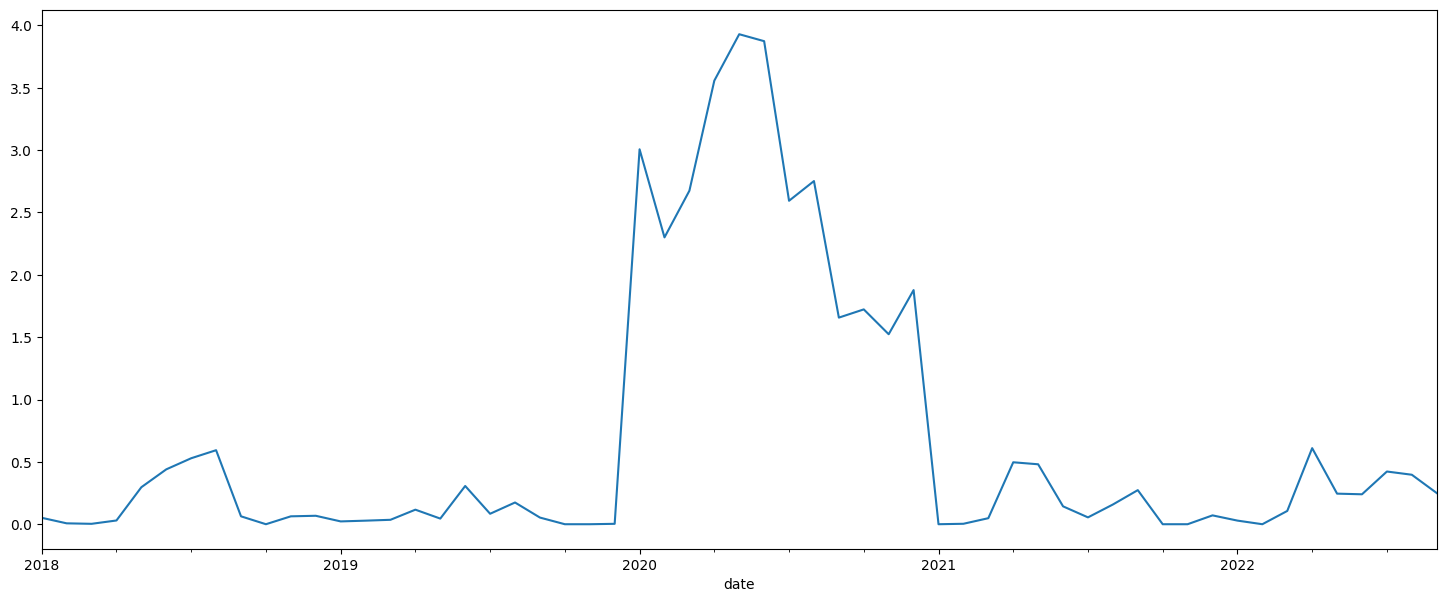

In [6]:
df['wind_speed_max'].plot(figsize=(18,7))
plt.show()

In [7]:
adfuller(df['wind_speed_max'])

(-2.032840450407845,
 0.2723618738294912,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 87.44603371020199)

In [8]:
df['shift']=df['wind_speed_max'].shift()
df['diff']=df['wind_speed_max']-df['shift']

In [10]:
adfuller(df['diff'].dropna())

(-8.581715889449258,
 7.69658081201073e-14,
 0,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 88.66604173003408)

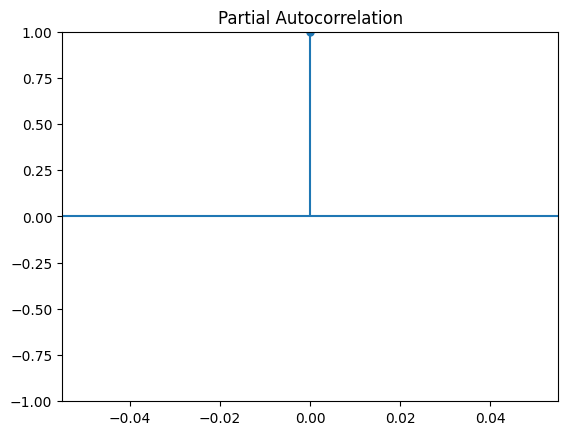

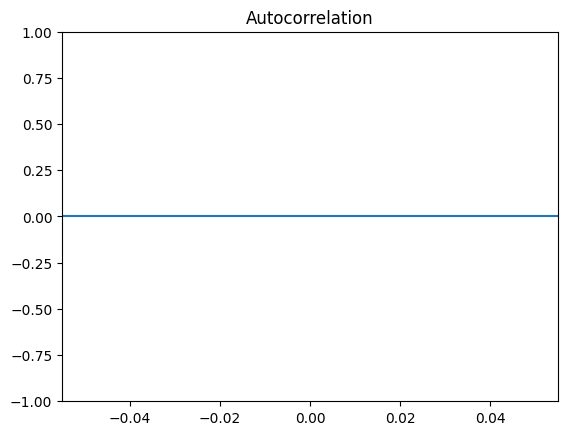

In [11]:
plot_pacf(df['diff'])
plot_acf(df['diff'])
plt.show()

In [15]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['diff'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 1.548165
         Iterations: 2
         Function evaluations: 53
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:178.49086311550835
Optimization terminated successfully.
         Current function value: 1.320216
         Iterations: 2
         Function evaluations: 153
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:154.50466403833877
Optimization terminated successfully.
         Current function value: 1.289715
         Iterations: 5
         Function evaluations: 190
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:153.02746224752244
Optimization terminated successfully.
         Current function value: 1.278230
         Iterations: 6
         Function evaluations: 278
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:153.71822494640594
Optimization terminated successfully.
         Current function value: 1.333813
         Iterations: 2
         Function evaluations: 49
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:156.05464028680257
Optimization terminated successf

Optimization terminated successfully.
         Current function value: 0.966290
         Iterations: 8
         Function evaluations: 725
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:126.15707416769068
Optimization terminated successfully.
         Current function value: 0.825295
         Iterations: 8
         Function evaluations: 623
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:106.083592799427
Optimization terminated successfully.
         Current function value: 0.812519
         Iterations: 10
         Function evaluations: 905
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:106.62716512059221
Optimization terminated successfully.
         Current function value: 0.812517
         Iterations: 16
         Function evaluations: 1613
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:108.62688873628159
Optimization terminated successfully.
         Current function value: 0.812518
         Iterations: 17
         Function evaluations: 1951
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:110.62700509739626
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 1.000468
         Iterations: 9
         Function evaluations: 777
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:128.05330750181622
Optimization terminated successfully.
         Current function value: 0.986179
         Iterations: 8
         Function evaluations: 734
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:128.42440446801118
Optimization terminated successfully.
         Current function value: 1.040885
         Iterations: 5
         Function evaluations: 352
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:130.66089705626257
Optimization terminated successfully.
         Current function value: 1.007285
         Iterations: 12
         Function evaluations: 1068
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:128.83049455370468
Optimization terminated successfully.
         Current function value: 1.015106
         Iterations: 7
         Function evaluations: 660
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:131.7220547518496
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.815853
         Iterations: 10
         Function evaluations: 1022
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:109.00718712102034
Optimization terminated successfully.
         Current function value: 0.815963
         Iterations: 10
         Function evaluations: 1094
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:111.01973811756717
Optimization terminated successfully.
         Current function value: 0.815974
         Iterations: 17
         Function evaluations: 2155
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:113.02106620296578
Optimization terminated successfully.
         Current function value: 1.231368
         Iterations: 4
         Function evaluations: 278
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:152.37599940785375
Optimization terminated successfully.
         Current function value: 1.010874
         Iterations: 8
         Function evaluations: 734
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:129.2396245962472
Optimization terminated s

In [16]:
train=df[:len(df)*80//100]
test=df[len(df)*80//100:]

In [17]:
model=sm.tsa.statespace.SARIMAX(train['wind_speed_max'],order=(0,1,1),seasonal_order=(2,1,0,12))

In [18]:
model_fit=model.fit()
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

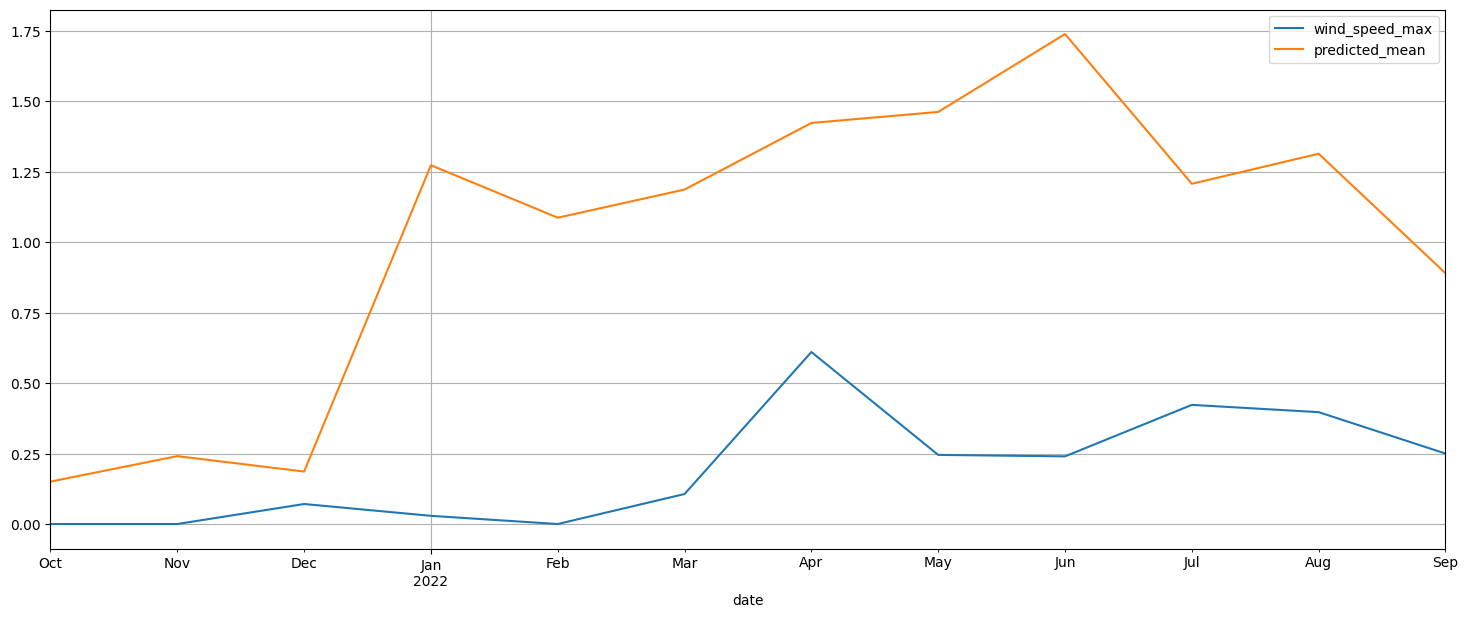

In [19]:
test['wind_speed_max'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [20]:
np.sqrt(mean_squared_error(test['wind_speed_max'],predictions))

0.9234793614372345

In [21]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])
future.set_index('date',inplace=True)
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

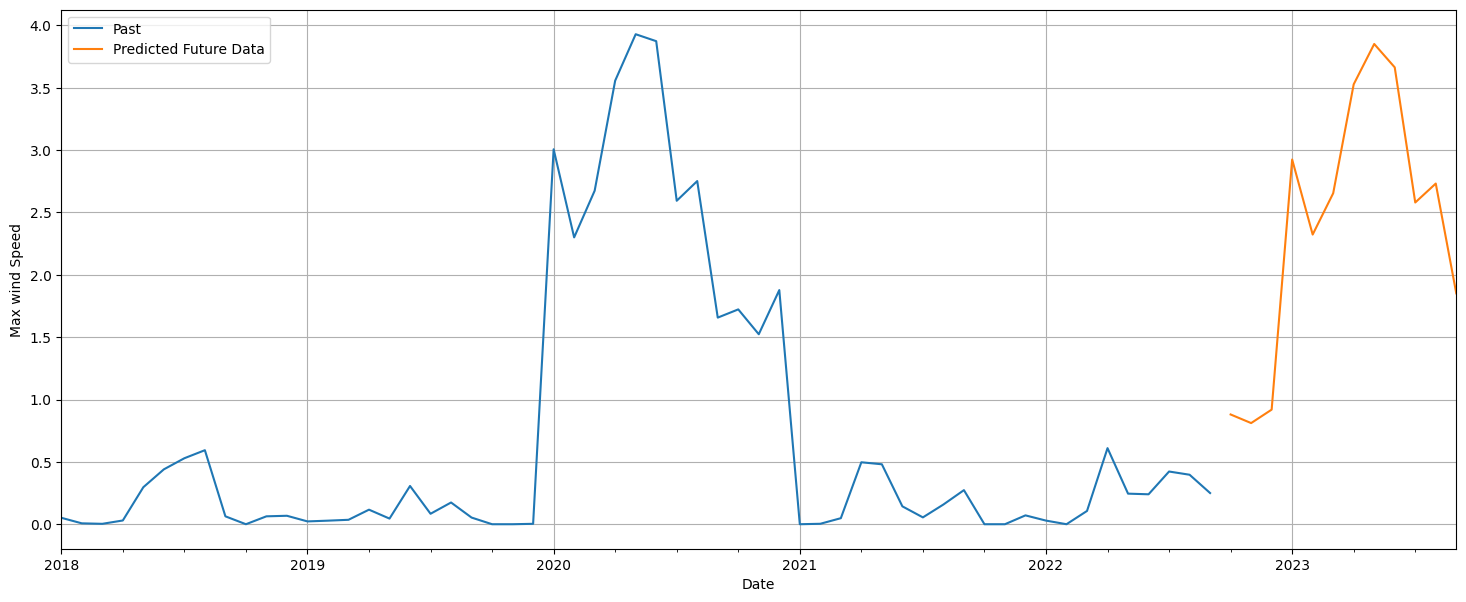

In [22]:
ax=df['wind_speed_max'].plot(label="Past Data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Max wind Speed")
plt.legend(["Past","Predicted Future Data"])
plt.grid()
plt.show()